In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./Charts/data/livermore_water_levels.csv')

In [3]:
df.head()

,system:time_start,waterArea
0,"Apr 9, 2013",15.636
1,"Apr 16, 2013",15.056
2,"May 27, 2013",0.000
3,"Jun 3, 2013",14.853
4,"Jun 19, 2013",14.780


In [4]:
df['dateTime'] = pd.to_datetime(df['system:time_start'])
df = df.drop(columns = ['system:time_start'])

In [6]:
df.head()

,waterArea
dateTime,
2013-04-09,15.636
2013-04-16,15.056
2013-05-27,0.000
2013-06-03,14.853
2013-06-19,14.780


In [5]:
df = df.set_index('dateTime')
df.head()

,waterArea
dateTime,
2013-04-09,15.636
2013-04-16,15.056
2013-05-27,0.000
2013-06-03,14.853
2013-06-19,14.780


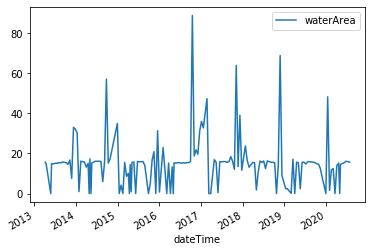

In [51]:
df = df[df['waterArea']<100].copy()
df.plot()

In [128]:
rain = pd.read_csv('./livermore_rain.csv')
rain = rain.drop(['Annual','Season'], axis = 1)
rain

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2013,1.10,0.46,0.00,0.30,0.03,0.07,0.00,0.00,0.30,0.00,0.96,0.58
1,2014,0.08,2.30,1.21,1.01,0.01,0.01,0.01,0.00,0.25,0.34,1.33,6.10
2,2015,0.03,1.81,0.17,0.96,0.38,0.25,0.03,0.01,0.02,0.05,2.27,2.75
3,2016,3.59,0.75,3.72,2.03,0.22,0.00,0.00,0.00,0.02,3.07,1.07,2.34
4,2017,7.87,6.34,1.87,1.77,0.03,0.00,0.00,0.00,0.02,0.22,2.27,0.10
5,2018,2.86,0.46,3.61,1.38,0.00,0.00,0.00,0.00,0.00,0.03,0.98,1.46
6,2019,2.66,5.85,2.13,0.30,1.64,0.00,0.00,0.00,0.13,0.00,1.15,2.18
7,2020,0.83,0.02,2.89,1.61,0.53,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [104]:
#rain.set_index('Year')

In [54]:
pd.to_datetime('January 2015')

Timestamp('2015-01-01 00:00:00')

Int64Index([1], dtype='int64')

In [76]:
rt = pd.DataFrame({'date_time':[],'rainfall':[]})
#rt.set_index(rt['date_time'])
rt.head()

,date_time,rainfall


In [80]:
new = pd.DataFrame({'date_time':[1],'rainfall':[2]})

In [81]:
rt.append(new)
rt.head()

,date_time,rainfall


In [91]:
rt = pd.DataFrame({'date_time':[1],'rainfall':[1]})
rt = rt.append(pd.DataFrame({'date_time':[2],'rainfall':[2]}))
rt.head()

,date_time,rainfall
0,1,1
0,2,2


In [130]:
rt = pd.DataFrame({'date_time':['a'],'rainfall':[999]})
rain_list = []
date_list = []

for year in rain["Year"]:
    
    ind = rain[rain['Year'] == year]
    
    for month in rain.drop(columns = ["Year"]).columns:
        
        rainfall = rain.loc[ind[0], month]
        rain_list.append(rainfall)
        
        date = pd.to_datetime(f"{month} {year}")
        date_list.append(date)

KeyError: 0

In [124]:
ind[0]

7

In [117]:
rt = pd.DataFrame({'date_time':date_list,'rainfall':rain_list})
rt.head()

,date_time,rainfall
0,2013-01-01,"0 1.1 Name: January, dtype: float64"
1,2013-02-01,"0 0.46 Name: February, dtype: float64"
2,2013-03-01,"0 0.0 Name: March, dtype: float64"
3,2013-04-01,"0 0.3 Name: April, dtype: float64"
4,2013-05-01,"0 0.03 Name: May, dtype: float64"


In [103]:
rt = pd.DataFrame({'date_time':['a'],'rainfall':[999]})
rain_list = []
date_list = []

for year in rain.Year:
    print(year)
    for month in rain.columns:
        
        
        
        rainfall = rain.loc[year,month]
        rain_list.append(rainfall)
        #print(rainfall)
        date = str(year) + " " + month
        date_list.append(date)
        #rain_frame = pd.DataFrame({'date_time':["hello"],'rainfall':[rainfall]})
        #rt = rt.append(rain_frame)


2013


KeyError: 2013

In [99]:
date_list[:10]

['0 Year',
 '0 January',
 '0 February',
 '0 March',
 '0 April',
 '0 May',
 '0 June',
 '0 July',
 '0 August',
 '0 September']

In [42]:
rain.drop('Year',axis = 1).columns

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')